# Statystyczne reguły decyzyjne

- Uladzislau Darhevich ud108519@student.sgh.waw.pl

## Praca domowa #3

###  Zadanie 2

Uruchom algorytmy grupowania hierarchicznego i DBSCAN na danych ze zbioru MNIST. Wybierz najlepsze wartości ich parametrów wejściowych. Wyznacz dla nich wynik ARI i AMI. Który z trzech omawianych algorytmów daje najlepszy rezultat? (10 punktów)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN

SEED = 42

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

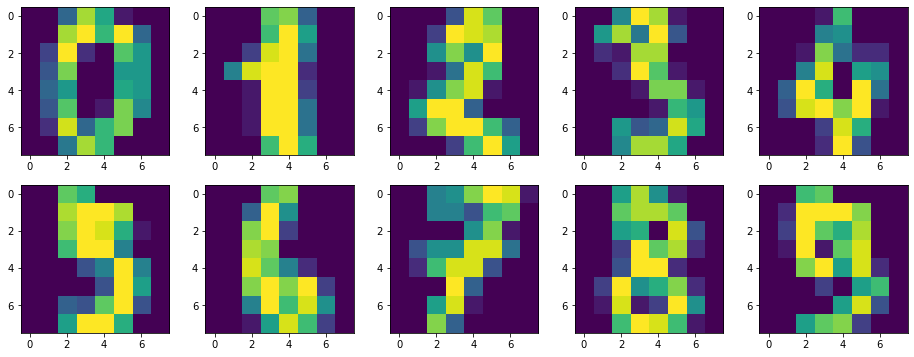

In [3]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

In [17]:
algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=SEED))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(DBSCAN(eps=1, min_samples=5))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': round(metrics.adjusted_rand_score(y, algo.labels_), 4),
        'AMI': round(metrics.adjusted_mutual_info_score(y, algo.labels_), 4)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI'],
                       index=['K-means', 'Agglomerative', 'DBSCAN'])

results

,ARI,AMI
K-means,0.665,0.7389
Agglomerative,0.794,0.8668
DBSCAN,0.000,0.0000


Z tabeli widać, że najlepiej działa  Agglomerative Clustering (algorytm grupowania hierarchicznego). Wartości ARI oraz AMI bliskie zeru mówią o niezależności podziałów, a bliskie jedności mówią o ich podobieństwie.

Użyjmy metodę redukcji wymiarów t-SNE

In [18]:
%%time

tsne = TSNE(random_state=SEED)
X_tsne = tsne.fit_transform(X)

Wall time: 12.8 s


In [26]:
algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=SEED))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(DBSCAN(eps=10, min_samples=100))

data = []
for algo in algorithms:
    algo.fit(X_tsne)
    data.append(({
        'ARI': round(metrics.adjusted_rand_score(y, algo.labels_), 4),
        'AMI': round(metrics.adjusted_mutual_info_score(y, algo.labels_), 4)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI'],
                       index=['K-means', 'Agglomerative', 'DBSCAN'])

results

,ARI,AMI
K-means,0.8913,0.9129
Agglomerative,0.8859,0.9103
DBSCAN,0.8402,0.9061
